In [1]:
import numpy as np
import pandas as pd
import feather

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [3]:
train_df = feather.read_dataframe('data/clean_train.feather')

In [4]:
train_df.head()

,ID,VAR_0001,VAR_0002,VAR_0003,VAR_0004,VAR_0005,VAR_0006,VAR_0007,VAR_0013,VAR_0014,...,VAR_0179_month,VAR_0179_year,VAR_0204_weekday,VAR_0204_day,VAR_0204_month,VAR_0204_year,VAR_0217_weekday,VAR_0217_day,VAR_0217_month,VAR_0217_year
0,2,H,224,0,4300,C,0.0,0.0,0.0,0.0,...,6,2012,2,29,1,2014,1,8,11,2011
1,4,H,7,53,4448,B,1.0,0.0,1.0,0.0,...,6,2012,5,1,2,2014,1,2,10,2012
2,5,H,116,3,3464,C,0.0,0.0,0.0,0.0,...,6,2012,3,30,1,2014,1,13,12,2011
3,7,H,240,300,3200,C,0.0,0.0,0.0,0.0,...,6,2012,5,1,2,2014,3,1,11,2012
4,8,R,72,261,2000,N,0.0,0.0,0.0,0.0,...,6,2012,2,29,1,2014,5,15,10,2011


## Categorical Encoding

In [5]:
for column in train_df.select_dtypes(include = 'object').columns.tolist():
    print(column + ' ' + str(train_df[column].nunique()))

VAR_0001 3
VAR_0005 4
VAR_0200 12385
VAR_0214 12
VAR_0237 45
VAR_0274 57
VAR_0283 7
VAR_0305 8
VAR_0325 9
VAR_0342 50
VAR_0352 4
VAR_0353 4
VAR_0354 4
VAR_0404 1823
VAR_0466 2
VAR_0467 4
VAR_0493 608
VAR_1934 5


In [6]:
for column in train_df.select_dtypes(include = 'object').columns.tolist():
    train_df[column] = train_df[column].replace('-1', 'Unknown')

In [7]:
VAR_0200_not_top_10 = train_df.groupby('VAR_0200').count().sort_values('ID', ascending = False).index[10:]
train_df['VAR_0200'].replace(VAR_0200_not_top_10, 'Other', inplace = True)

In [8]:
VAR_0404_not_top_10 = train_df.groupby('VAR_0404').count().sort_values('ID', ascending = False).index[10:]
train_df['VAR_0404'].replace(VAR_0404_not_top_10, 'Other', inplace = True)

In [9]:
VAR_0493_not_top_10 = train_df.groupby('VAR_0493').count().sort_values('ID', ascending = False).index[10:]
train_df['VAR_0493'].replace(VAR_0493_not_top_10, 'Other', inplace = True)

In [10]:
encoded_train_df = pd.concat([train_df, pd.get_dummies(train_df[train_df.select_dtypes(include = 'object').columns.tolist()])], axis = 1)

In [11]:
for column in train_df.select_dtypes(include = 'object').columns.tolist():
    print(column + ' ' + str(train_df[column].nunique()))

VAR_0001 3
VAR_0005 4
VAR_0200 11
VAR_0214 12
VAR_0237 45
VAR_0274 57
VAR_0283 7
VAR_0305 8
VAR_0325 9
VAR_0342 50
VAR_0352 4
VAR_0353 4
VAR_0354 4
VAR_0404 11
VAR_0466 2
VAR_0467 4
VAR_0493 11
VAR_1934 5


In [12]:
encoded_train_df.drop(train_df.select_dtypes(include = 'object').columns.tolist(), axis = 1, inplace = True)

In [13]:
encoded_train_df.head()

,ID,VAR_0002,VAR_0003,VAR_0004,VAR_0006,VAR_0007,VAR_0013,VAR_0014,VAR_0015,VAR_0016,...,VAR_0493_PERMANENT EMPLOYEE REGISTRATION CARD,VAR_0493_PHARMACY TECHNICIAN,VAR_0493_PROFESSIONAL NURSE,VAR_0493_REGISTERED NURSE,VAR_0493_Unknown,VAR_1934_BRANCH,VAR_1934_CSC,VAR_1934_IAPS,VAR_1934_MOBILE,VAR_1934_RCC
0,2,224,0,4300,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,1,0,0
1,4,7,53,4448,1.0,0.0,1.0,0.0,1.0,2.0,...,0,0,0,0,1,0,0,1,0,0
2,5,116,3,3464,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,1,0,0,1,0,0
3,7,240,300,3200,0.0,0.0,0.0,0.0,0.0,2.0,...,0,0,0,0,1,0,0,0,0,1
4,8,72,261,2000,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,1,1,0,0,0,0


# Random Forests

In [14]:
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, roc_curve, auc, f1_score

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier



## Do Sample First

In [104]:
x_im = encoded_train_df.sample(frac = 0.25, random_state = 2).drop('target', axis = 1)
y_im = encoded_train_df.sample(frac = 0.25, random_state = 2)['target'].values

x_train, x_valid, y_train, y_valid = train_test_split(x_im, y_im, test_size = 0.1, random_state = 3)

In [105]:
m_sample = RandomForestClassifier()
m_sample.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [106]:
sample_preds = cross_val_predict(m_sample, x_train, y_train, cv = 3)

In [107]:
confusion_matrix(y_train, sample_preds)

array([[23882,  1262],
       [ 6190,  1343]], dtype=int64)

In [108]:
f1_score(y_train, sample_preds)

0.26494377589268103

In [109]:
fpr, tpr, thresholds = roc_curve(y_train, sample_preds)

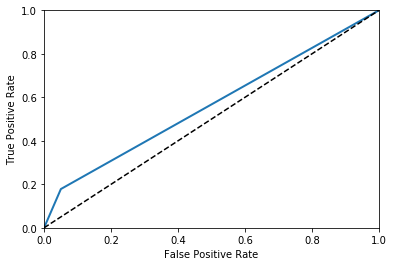

In [110]:
plot_roc_curve(fpr, tpr);

In [111]:
m_sample = RandomForestClassifier(n_estimators = 10)
m_sample.fit(x_train, y_train)
f1_score(y_train, m_sample.predict(x_train)), f1_score(y_valid, m_sample.predict(x_valid))

(0.9603639622251327, 0.28309741881765194)

In [114]:
m_sample = RandomForestClassifier(n_estimators = 20)
m_sample.fit(x_train, y_train)
f1_score(y_train, m_sample.predict(x_train)), f1_score(y_valid, m_sample.predict(x_valid))

(0.9894708604386024, 0.2852263023057216)

In [115]:
m_sample = RandomForestClassifier(n_estimators = 40)
m_sample.fit(x_train, y_train)
f1_score(y_train, m_sample.predict(x_train)), f1_score(y_valid, m_sample.predict(x_valid))

(0.9982712765957447, 0.2830025884383089)

In [116]:
m_sample = RandomForestClassifier(n_estimators = 20, min_samples_leaf = 3)
m_sample.fit(x_train, y_train)
f1_score(y_train, m_sample.predict(x_train)), f1_score(y_valid, m_sample.predict(x_valid))

(0.9123919308357349, 0.3327974276527331)

In [117]:
m_sample = RandomForestClassifier(n_estimators = 20, min_samples_leaf = 10)
m_sample.fit(x_train, y_train)
f1_score(y_train, m_sample.predict(x_train)), f1_score(y_valid, m_sample.predict(x_valid))

(0.60100045475216, 0.2800687285223367)

In [118]:
m_sample = RandomForestClassifier(n_estimators = 20, min_samples_leaf = 30)
m_sample.fit(x_train, y_train)
f1_score(y_train, m_sample.predict(x_train)), f1_score(y_valid, m_sample.predict(x_valid))

(0.3635423132629837, 0.2395644283121597)

In [119]:
m_sample = RandomForestClassifier(n_estimators = 20, min_samples_leaf = 3, max_features = 0.5)
m_sample.fit(x_train, y_train)
f1_score(y_train, m_sample.predict(x_train)), f1_score(y_valid, m_sample.predict(x_valid))

(0.9489518768716484, 0.34227129337539436)

In [120]:
m_sample = RandomForestClassifier(n_estimators = 20, min_samples_leaf = 3, max_features = 0.8)
m_sample.fit(x_train, y_train)
f1_score(y_train, m_sample.predict(x_train)), f1_score(y_valid, m_sample.predict(x_valid))

(0.9485355648535564, 0.3381877022653722)

In [121]:
m_sample = RandomForestClassifier(n_estimators = 20, min_samples_leaf = 3, max_features = 0.2)
m_sample.fit(x_train, y_train)
f1_score(y_train, m_sample.predict(x_train)), f1_score(y_valid, m_sample.predict(x_valid))

(0.9486303756882972, 0.33199033037872683)

## Best RF on Sample

In [122]:
m_sample = RandomForestClassifier(n_estimators = 20, min_samples_leaf = 3, max_features = 0.5, n_jobs = -1)
m_sample.fit(x_train, y_train)
f1_score(y_train, m_sample.predict(x_train)), f1_score(y_valid, m_sample.predict(x_valid))

(0.949376784346494, 0.3262987012987013)

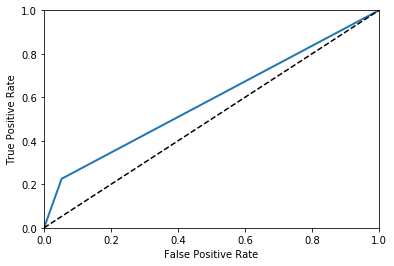

In [128]:
fpr, tpr, thresholds = roc_curve(y_valid, m_sample.predict(x_valid))
plot_roc_curve(fpr, tpr);

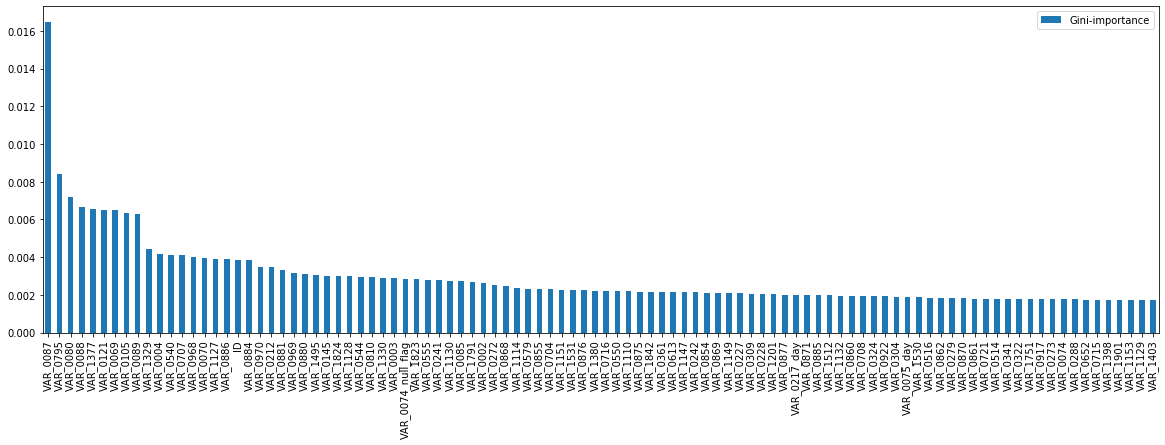

In [140]:
num_feats = 100
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(x_train.columns, m_sample.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance', ascending = False)[:num_feats].plot(kind='bar', figsize = (20,6));

In [141]:
to_keep = importances.sort_values(by='Gini-importance', ascending = False)[:num_feats].index.tolist() + ['target']

In [142]:
x_im = encoded_train_df[to_keep].drop('target', axis = 1)
y_im = encoded_train_df['target'].values

x_train, x_valid, y_train, y_valid = train_test_split(x_im, y_im, test_size = 0.1, random_state = 3)

In [143]:
m = RandomForestClassifier(n_estimators = 20, min_samples_leaf = 3, max_features = 0.5, n_jobs = -1)
m.fit(x_train, y_train)
f1_score(y_train, m.predict(x_train)), f1_score(y_valid, m.predict(x_valid))

(0.9381809278981517, 0.3575807110747854)

In [155]:
fpr, tpr, thresholds = roc_curve(y_valid, m.predict(x_valid))
auc(fpr, tpr)

0.6012816681219239

Best score is approx 0.8, but 0.5 is random. So only slightly better than random

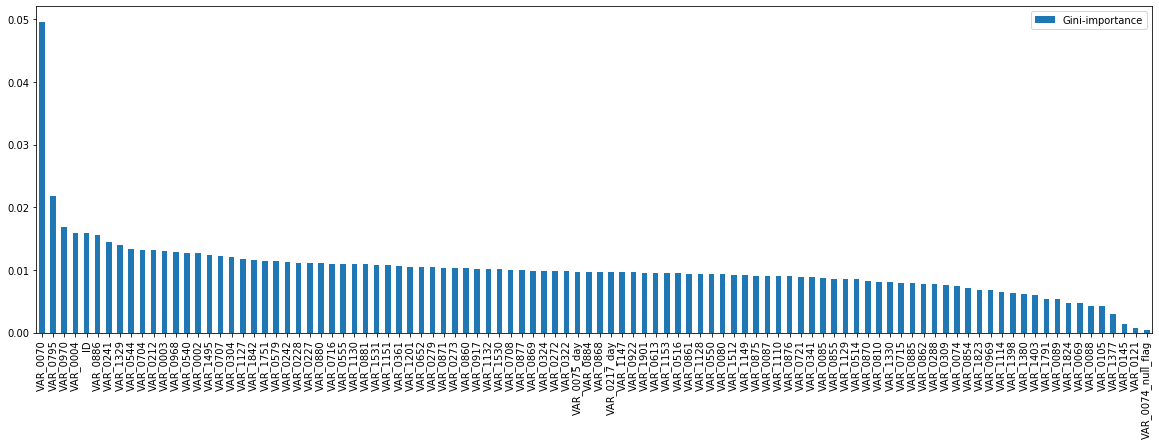

In [144]:
num_feats = 100
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(x_train.columns, m.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance', ascending = False)[:num_feats].plot(kind='bar', figsize = (20,6));

# Stochastic Gradient Descent

In [139]:
x_im = encoded_train_df.drop('target', axis = 1)
y_im = encoded_train_df['target'].values

x_train, x_valid, y_train, y_valid = train_test_split(x_im, y_im, test_size = 0.1, random_state = 3)

In [138]:
from sklearn.linear_model import SGDClassifier

In [140]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [141]:
fpr, tpr, thresholds = roc_curve(y_valid, sgd.predict(x_valid))
auc(fpr, tpr)

0.5524723940641134

# Support Vector Machine

In [142]:
from sklearn.svm import LinearSVC

In [143]:
svc = LinearSVC()
svc.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [144]:
fpr, tpr, thresholds = roc_curve(y_valid, svc.predict(x_valid))
auc(fpr, tpr)

0.5419817672877717

## Next Steps
GridSearch on Gradient Descent maybe

Gradient Boosting Classifier

Stacking Classifier Potentially

LGB